# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Muhammad Tsaqiif Ash-Shiddiq
- **Email:** Muhammadtsaqiif.ash@gmail.com
- **ID Dicoding:** Muhammad Tsaqiif A
- **Cohort ID:** MC299D5Y1770

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki akumulasi final revenue paling banyak dan paling sedikit?
- Di daerah pelanggan mana saja pengiriman mengalami keterlambatan paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import sys
sys.executable

'c:\\Users\\Asus\\.virtualenvs\\DBS-Jcyqc6C0\\Scripts\\python.exe'

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import unicodedata
import folium
from branca.colormap import linear

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("data\\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Customer city sepertinya berasal dari negara Brazil
- Customer memiliki 2(dua) id yaitu customer_id dan customer_unique_id
- 1(satu) customer_unique_id bisa memiliki **lebih dari** 1(satu) customer_id

In [4]:
geolocation_df = pd.read_csv("data\\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Dataset ini berisi geolocation berdasarkan **zip_code_prefix**
- State pada geolocation menggunakan kode state

In [5]:
orders_df = pd.read_csv("data\\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dataset orders mengambil foreign key DF customer melalui customer_id bukan customer_unique_id
- Terdapat beberapa datetime yang digunakan yaitu tgl pembelian, tgl pesanan disetujui, tgl pesanan dikirim oleh kurir, tgl pesanan diterima pelanggan, tgl estimasi pengiriman pesanan

In [6]:
order_items_df = pd.read_csv("data\\order_items_dataset.csv")
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


**Insight:**
- DF order_items mengambil foreign key order_id dan memiliki primary key di product_id
- Setiap product_id memiliki seller_id, Bisa saja seller_id memiliki **lebih dari** 1(satu) product_id

In [7]:
order_payments_df = pd.read_csv("data\\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Payment mengambil foreign key order_id
- Payment type yang disediakan yaitu credit_card, boleto, voucher, debit_card, not_defined
- Payment installment paling banyak di 24 bulan

In [8]:
order_reviews_df = pd.read_csv("data\\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Memiliki review_id sebagai primary dan mengambil order_id sebagai foreign key
- Isi review terdapat score, comment title, comment message
- Tgl yang dicantumkan ada Tanggal ulasan dibuat oleh pelanggan, dan Tanggal ulasan dibalas oleh sistem atau penjual

In [9]:
products_df = pd.read_csv("data\\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataset products memiliki informasi produk kategori, panjang nama, panjang deskripsi, jumlah photo produk, berat produk, panjang, tinggi, dan lebar produk
- product_id ini digunakan pada Data Frame order_items
- Nama kategori produk menggunakan bahasa portugis

In [10]:
product_category_name_translation_df = pd.read_csv("data\\product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset ini berisi terjemahan dari bahasa portugis ke bahasa Inggirs

In [11]:
sellers_df = pd.read_csv("data\\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset ini berisi data penjual dari zip_code_prefix nya, kota penjual, dan state asal penjual

### Assessing Data

#### Assess Data Frame Customers

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data
- Tidak ada anomali pada tipe data
- Tidak ada dataset empty

#### Assess Data Frame Geolocation

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


**Insight:**
- Tidak ada duplikasi data
- Tidak ada anomali pada tipe data
- Ada 261831 duplikasi data

#### Assess Data Frame Orders

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
missing_percentage = (orders_df.isnull().sum() / len(orders_df)) * 100
print(missing_percentage)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64


In [21]:
# orders_df[orders_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
(orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).describe()

count                           96476
mean     -12 days +19:42:04.042383598
std        10 days 04:28:00.181984555
min               -147 days +23:36:47
25%         -17 days +18:08:05.250000
50%         -12 days +01:13:31.500000
75%                 -7 days +14:38:24
max                 188 days 23:24:07
dtype: object

In [22]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data
- Tipe Data seharusnya **datetime** pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- Ada data yang tidak memiliki nilai/value

#### Assess Data Frame order_items

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
- Tidak ada duplikasi data
- Perlu perbaikan tipe data pada kolom shipping_limit_date
- Tidak ada data yang NaN

#### Assess Data Frame order_payments

In [27]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Tidak ada duplikasi data
- Tidak ada anomali pada tipe data
- Tidak ada data dengan value kosong

#### Assess Data Frame order_reviews

In [31]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight:**
- Tidak ada duplikasi data
- Perlu perbaikan tipe data ke **datetime** pada review_creation_date, dan review_answer_timestamp
- Ada data yang tidak memiliki nilai/value pada kolom review_comment_title, dan review_comment_message

#### Assess Data Frame products

In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
- Tidak ada duplikasi data
- Tidak ada anomali pada tipe data
- Ada bebrapa kolom yang memiliki data dengan value kosong

#### Assess Data Frame product_category_name_translation

In [39]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [41]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data
- Tidak ada anomali pada tipe data
- Tidak ada data dengan value kosong

#### Assess Data Frame sellers

In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data
- Tidak ada anomali pada tipe data
- Tidak ada data dengan value kosong

### Cleaning Data

#### Cleaning geolocations

In [45]:
# Drop duplikasi
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [108]:
def normalize_city_name(city_name):
    # Normalisasi Unicode dan ubah menjadi huruf kecil
    normalize = unicodedata.normalize('NFKD', city_name).encode('ASCII', 'ignore').decode('ASCII').lower()
    return normalize.title()

**Insight:**
- Menghapus data yang terdeteksi duplikasi
- Mendefinisikan function untuk normalisasi nama kota

#### Cleaning orders

In [46]:
# Konversi semua kolom tanggal ke datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Mengubah tipe data dari tanggal menjadi datetime agar bisa diolah

In [47]:
orders_df = orders_df.drop(orders_df[orders_df['order_status'].isin(['canceled', 'unavailable'])].index)

In [48]:
median_days_difference = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).median()
orders_df.loc[
    (orders_df['order_delivered_customer_date'].isna()) & (orders_df['order_status'] == 'delivered'),
    'order_delivered_customer_date'
] = orders_df['order_estimated_delivery_date'] + median_days_difference

count_nan_delivered = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna())].shape[0]
print(f"Jumlah data 'delivered' tetapi order_delivered_customer_date NaN: {count_nan_delivered}")

Jumlah data 'delivered' tetapi order_delivered_customer_date NaN: 0


**Insight:**
- Menghapus data dengan value NaN pada order_delivered_customer_date yang order_statusnya canceled dan unavailable
- Mengisi nilai value untuk pesanan delivered dan NaN menjadi tanggal estimasi delivery + Median selisih tgl delivered dengan estimasi untuk yang bukan NaN

In [49]:
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

**Insight:**
- Membuat delivery_delay untuk menghitung keterlambatan

#### Cleaning order_items

In [50]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Mengubah menjadi tipe data datetime untuk shipping_limit_date

#### Cleaning order_reviews

In [51]:
order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"])
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(order_reviews_df["review_answer_timestamp"])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- Mengubah menjadi datetime untuk kedua kolom yang berinformasikan tanggal

In [52]:
order_reviews_df = order_reviews_df.assign(
    review_comment_title=order_reviews_df["review_comment_title"].fillna("No Title"),
    review_comment_message=order_reviews_df["review_comment_message"].fillna("No Comment")
)
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Cleaning products

In [53]:
products_df = products_df.assign(
    product_category_name=products_df["product_category_name"].fillna("Unknown"),
    product_name_lenght=products_df["product_name_lenght"].fillna(products_df["product_name_lenght"].median()),
    product_description_lenght=products_df["product_description_lenght"].fillna(products_df["product_description_lenght"].median()),
    product_photos_qty=products_df["product_photos_qty"].fillna(products_df["product_photos_qty"].median()),
    product_weight_g=products_df["product_weight_g"].fillna(products_df["product_weight_g"].median()),
    product_length_cm=products_df["product_length_cm"].fillna(products_df["product_length_cm"].median()),
    product_height_cm=products_df["product_height_cm"].fillna(products_df["product_height_cm"].median()),
    product_width_cm=products_df["product_width_cm"].fillna(products_df["product_width_cm"].median()),
)

**Insight:**
- Mengisi NaN value pada kolom nama kategori menjadi Unknown
- Mengisi nilai NaN pada yang lain menggunakan median agar menghindari outlier

In [54]:
products_df = products_df.merge(product_category_name_translation_df, 
                                on='product_category_name', 
                                how='left')

products_df.drop(columns=['product_category_name'], inplace=True)
products_df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)
print(products_df[['product_id', 'product_category_name']].head(10))

                         product_id product_category_name
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery
1  3aa071139cb16b67ca9e5dea641aaa2f                   art
2  96bd76ec8810374ed1b65e291975717f        sports_leisure
3  cef67bcfe19066a932b7673e239eb23d                  baby
4  9dc1a7de274444849c219cff195d0b71            housewares
5  41d3672d4792049fa1779bb35283ed13   musical_instruments
6  732bd381ad09e530fe0a5f457d81becb            cool_stuff
7  2548af3e6e77a690cf3eb6368e9ab61e       furniture_decor
8  37cc742be07708b53a98702e77a21a02       home_appliances
9  8c92109888e8cdf9d66dc7e463025574                  toys


**Insight:**
- Mengubah product_category_name menjadi terjemahan bahasa inggris

#### Create New Data Frame delivered_orders_df

In [55]:
delivered_orders_df = orders_df[orders_df['order_status'] == 'delivered']
delivered_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10.0


In [56]:
delivered_orders_df.loc[delivered_orders_df['order_approved_at'].isna(), 'order_approved_at'] = delivered_orders_df['order_purchase_timestamp']

In [57]:
median_time_to_carrier = (delivered_orders_df['order_delivered_carrier_date'] - delivered_orders_df['order_approved_at']).median()

# Isi NaN dengan estimasi waktu berdasarkan median
delivered_orders_df.loc[delivered_orders_df['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = (
    delivered_orders_df['order_approved_at'] + median_time_to_carrier
)
delivered_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_delay                   0
dtype: int64

**Insight:**
- Membuat data frame baru yang memuat hanya data orders dengan status delivered
- Membersihkan data dari data NaN value

## Exploratory Data Analysis (EDA)

### Distribusi Final Revenue Per Seller

In [58]:
delivered_order_items = order_items_df.merge(delivered_orders_df[['order_id']], on='order_id', how='inner')

revenue_per_seller = delivered_order_items.groupby('seller_id')['price'].sum().reset_index()
revenue_per_seller = revenue_per_seller.sort_values(by='price', ascending=False)

**Insight:**
- Revenue yang diambil hanya untuk order yang sudah di deliver mengambil dari delivered_orders_df

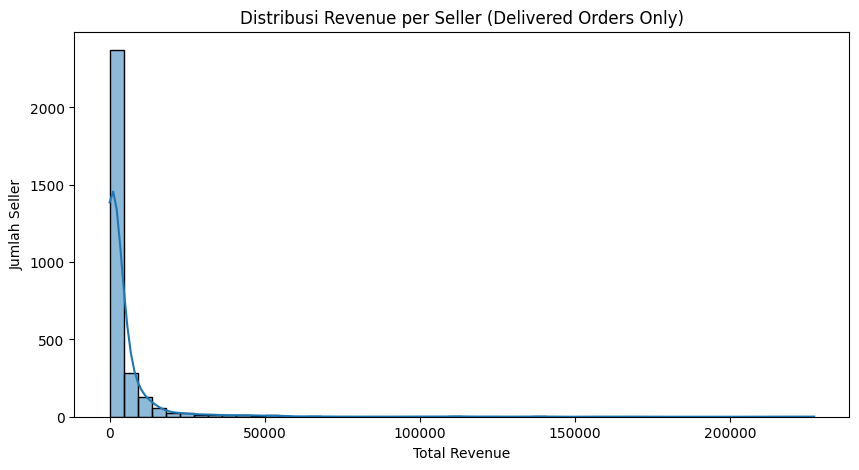

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(revenue_per_seller['price'], bins=50, kde=True)
plt.title("Distribusi Revenue per Seller (Delivered Orders Only)")
plt.xlabel("Total Revenue")
plt.ylabel("Jumlah Seller")
plt.show()

### Mengidentifikasi Lokasi Kota Seller dengan Akumulasi Revenue Terbesar dan Terkecil

In [112]:
revenue_sellers = revenue_per_seller.merge(sellers_df, on='seller_id', how='left')
revenue_per_city = revenue_sellers.groupby(['seller_city', 'seller_state'])['price'].sum().reset_index()
revenue_per_city['seller_city'] = revenue_per_city['seller_city'].apply(normalize_city_name)

In [113]:
# Seller dengan revenue terbesar
revenue_per_city = revenue_per_city.sort_values(by='price', ascending=False)
print("Top 10 Kota dengan Revenue Terbesar:")
print(revenue_per_city.head(10))

Top 10 Kota dengan Revenue Terbesar:
          seller_city seller_state       price
527         Sao Paulo           SP  2628634.52
230          Ibitinga           SP   614836.09
161          Curitiba           PR   455953.73
457    Rio De Janeiro           RJ   342054.97
223         Guarulhos           SP   318217.59
449    Ribeirao Preto           SP   267478.85
262   Itaquaquecetuba           SP   228460.34
221           Guariba           SP   226987.93
492       Santo Andre           SP   223280.71
306  Lauro De Freitas           BA   220689.44


In [114]:
# Seller dengan revenue terkecil
revenue_per_city = revenue_per_city.sort_values(by='price', ascending=True)
print("Top 10 Seller dengan Revenue Terkecil:")
print(revenue_per_city.head(10))

Top 10 Seller dengan Revenue Terkecil:
               seller_city seller_state  price
388               Palotina           PR   9.99
318               Macatuba           SP  13.00
284                 Jarinu           SP  14.63
75   Bom Jesus Dos Perdoes           SP  19.90
188           Floranopolis           SC  19.98
446                Resende           RJ  19.99
124              Cascavael           PR  21.99
56              Barro Alto           BA  23.90
145                 Condor           RS  24.90
85                  Brotas           SP  25.00


**Insight:**
- Seller terbesar memiliki final revenue sebesar 226987.93 dan terkecil di 6.50

### Menganalisis Daerah Keterlambatan Pengiriman

In [109]:
# Gabungkan orders_df dengan customers_df
orders_customers_geo_df = orders_df.merge(customers_df, on='customer_id', how='left')

# Gabungkan dengan geolocation_df menggunakan zip_code
orders_customers_geo_df = orders_customers_geo_df.merge(geolocation_df, 
                                                         left_on='customer_zip_code_prefix', 
                                                         right_on='geolocation_zip_code_prefix', 
                                                         how='left')

# Normalisasi nama kota
orders_customers_geo_df['customer_city'] = orders_customers_geo_df['customer_city'].apply(normalize_city_name)

# Cek hasilnya
orders_customers_geo_df[['customer_id', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng', 'delivery_delay']].head()

,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,delivery_delay
0,9ef432eb6251297304e76186b10a928d,Sao Paulo,SP,-23.574809,-46.587471,-8.0
1,9ef432eb6251297304e76186b10a928d,Sao Paulo,SP,-23.578333,-46.587123,-8.0
2,9ef432eb6251297304e76186b10a928d,Sao Paulo,SP,-23.575033,-46.587451,-8.0
3,9ef432eb6251297304e76186b10a928d,Sao Paulo,SP,-23.580054,-46.586673,-8.0
4,9ef432eb6251297304e76186b10a928d,Sao Paulo,SP,-23.576281,-46.587276,-8.0


**Menggabungkan geolocation_df dengan orders_df agar orders memiliki informasi latitude dan longtitude**

In [110]:
delay_per_city_avg = orders_customers_geo_df.groupby("customer_city")["delivery_delay"].mean().reset_index()

# Urutkan berdasarkan jumlah keterlambatan terbanyak
delay_per_city_avg = delay_per_city_avg.sort_values(by="delivery_delay", ascending=False)

# Tampilkan 10 kota dengan keterlambatan pengiriman terbanyak
delay_per_city_avg.head(10)

,customer_city,delivery_delay
2542,Novo Brasil,126.0
795,Capinzal Do Norte,78.0
24,Adhemar De Barros,73.0
231,Arace,53.0
3689,Serra Dos Dourados,52.0
2216,Marcelino Vieira,49.0
247,Aramari,43.0
1554,Humildes,42.0
3208,Rubineia,41.0
1430,Glaura,37.0


In [111]:
avg_coords_per_city = orders_customers_geo_df.groupby('customer_city')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

city_coords_with_delay = delay_per_city_avg.merge(
    avg_coords_per_city,
    on='customer_city',
    how='left'
)

city_coords_with_delay = city_coords_with_delay.dropna(subset=['geolocation_lat', 'geolocation_lng'])
# city_coords_with_delay['customer_city'].sort_values().tolist()

**Mengelompokan menjadi per kota dan Menambahkan koordinat untuk kota kotanya** 

#### Menggabungkan semua Data Frame yang diperlukan untuk dashboard

In [123]:
all_df = city_coords_with_delay.merge(
    revenue_per_city,
    left_on='customer_city',
    right_on='seller_city',
    how='outer' 
)

all_df = all_df.sort_values(by='price', ascending=True)
all_df.head()

,customer_city,delivery_delay,geolocation_lat,geolocation_lng,seller_city,seller_state,price
2673,Palotina,-12.000000,-24.283851,-53.838069,Palotina,PR,9.99
2160,Macatuba,-13.833333,-22.514469,-48.717087,Macatuba,SP,13.00
1960,Jarinu,-13.055556,-23.096674,-46.717403,Jarinu,SP,14.63
528,Bom Jesus Dos Perdoes,-11.294118,-23.136161,-46.468852,Bom Jesus Dos Perdoes,SP,19.90
1360,NaN,NaN,NaN,NaN,Floranopolis,SC,19.98


**Insight:**
- Disini data city_coords_with_delay yang digunakan untuk menjawab pertanyaan dua akan di merge dengan revenue_per_city yang digunakan untuk pertanyaan pertama

In [130]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Menggunakan Bar chart Vertikal untuk visualisasi kota dengan seller revenue terbesar dan terkecil

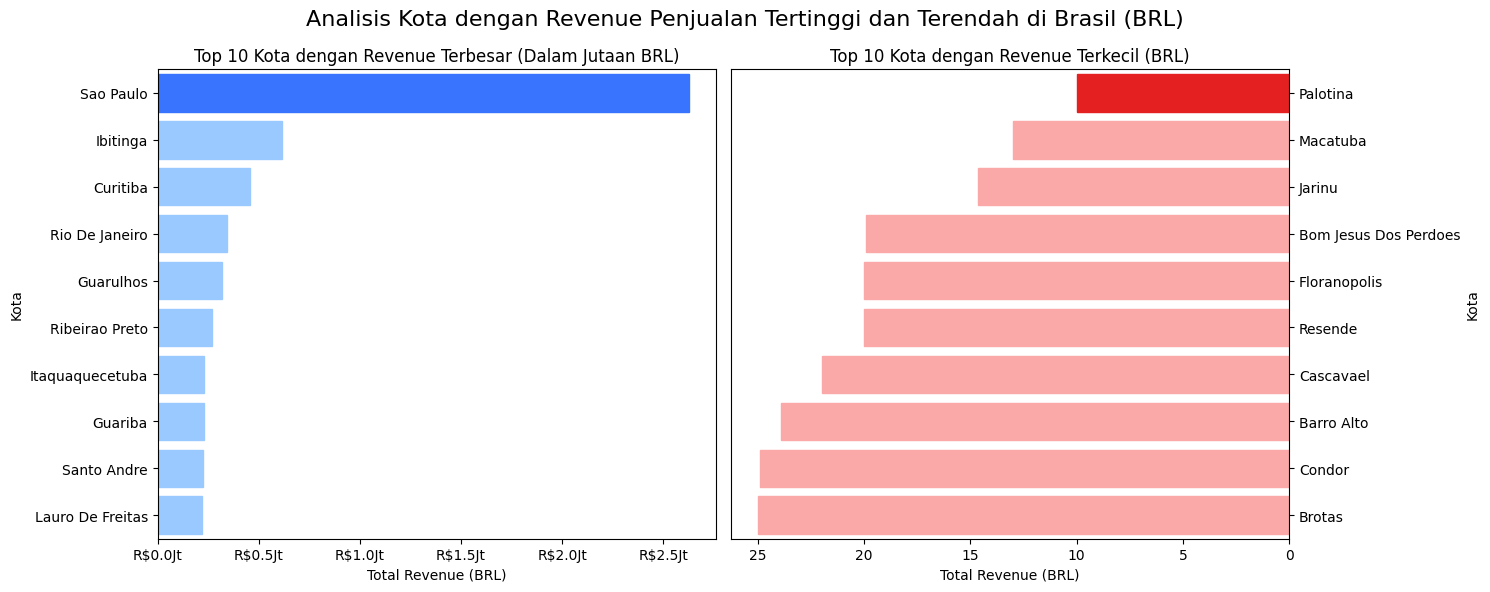

In [128]:
# Ambil 10 kota dengan revenue terbesar
top_10_revenue_cities = all_df.nlargest(10, 'price')

# Ambil 10 kota dengan revenue terkecil
bottom_10_revenue_cities = all_df.nsmallest(10, 'price')

# Format angka menjadi jutaan
def format_million(x, _):
    return f'R${x/1_000_000:.1f}Jt'

top_colors = ['#3974FE'] + ['#9AC9FF'] * (len(top_10_revenue_cities) - 1)
bottom_colors = ['#E52020'] + ['#FAA8A8'] * (len(bottom_10_revenue_cities) - 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot revenue terbesar
sns.barplot(
    data=top_10_revenue_cities, 
    x='price', 
    y='seller_city', 
    ax=axes[0]
)
axes[0].set_title('Top 10 Kota dengan Revenue Terbesar (Dalam Jutaan BRL)')
axes[0].set_xlabel('Total Revenue (BRL)')
axes[0].set_ylabel('Kota')
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_million))  # Format ke juta

for bar, color in zip(axes[0].patches, top_colors):
    bar.set_color(color)

# Plot revenue terkecil
sns.barplot(
    data=bottom_10_revenue_cities, 
    x='price', 
    y='seller_city', 
    ax=axes[1]
)
axes[1].set_title('Top 10 Kota dengan Revenue Terkecil (BRL)')
axes[1].set_xlabel('Total Revenue (BRL)')
axes[1].set_ylabel('Kota')
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right") 
axes[1].yaxis.tick_right() 

for bar, color in zip(axes[1].patches, bottom_colors):
    bar.set_color(color)
    
fig.suptitle('Analisis Kota dengan Revenue Penjualan Tertinggi dan Terendah di Brasil (BRL)', fontsize=16)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

#### Visualisasi Keterlambatan dengan Peta

In [124]:
top_20_cities = all_df.nlargest(20, 'delivery_delay')

# Mewarnai peta dengan warna sesuai dengan keterlambatan
colormap = linear.YlOrRd_09.scale(top_20_cities['delivery_delay'].min(), top_20_cities['delivery_delay'].max())

# Buat peta Brazil
map_brazil = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Tambahkan marker untuk 10 kota dengan keterlambatan tertinggi
for index, row in top_20_cities.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=16, 
        color=colormap(row['delivery_delay']),
        fill=True,
        fill_color=colormap(row['delivery_delay']),
        fill_opacity=0.6
    ).add_to(map_brazil)

# Tambahkan colormap ke peta
colormap.add_to(map_brazil)

# Tampilkan peta
map_brazil

#### Heatmap sebaran daerah kota yang memiliki rata-rata delay pengiriman

In [129]:
top_250_cities = all_df.nlargest(250, 'delivery_delay')

heat_data = top_250_cities[['geolocation_lat', 'geolocation_lng', 'delivery_delay']]

# Buat peta Brazil
heatmap_brazil = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Tambahkan heatmap ke peta
HeatMap(data=heat_data[['geolocation_lat', 'geolocation_lng', 'delivery_delay']], radius=15).add_to(heatmap_brazil)

# Tampilkan peta
heatmap_brazil

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Sao Paulo merupakan kota dengan revenue tertinggi, yang kemungkinan besar disebabkan oleh tingginya jumlah transaksi dan besarnya daya beli pelanggan di kota besar. Sao Paulo memiliki konsentrasi seller dan pelanggan yang lebih besar dibandingkan kota lain.
Dengan begitu, memungkinkan untuk menargetkan pemasaran di kota Sao Paulo yang memiliki potensi pasar yang besar.

Palotina merupakan kota dengan revenue terendah, yang kemungkinan disebabkan oleh rendahnya jumlah transaksi, daya beli pelanggan yang lebih kecil, atau keterbatasan jumlah seller yang beroperasi di wilayah tersebut.
Dengan data ini mungkin diperlukan strategi promosi atau subsidi pengiriman yang dapat menjadi cara untuk meningkatkan transaksi di Palotina dan wilayah lain yang minim transaksi.

- Beberapa daerah pelanggan dengan tingkat keterlambatan tertinggi berada di wilayah terpencil atau wilayah yang memiliki akses terbatas dari daerah kota-kota besar. Delay ini dihasilkan dari hitungan estimasi waktu pengiriman. Dan kota dengan rata-rata delay tertinggi ada pada daerah Colatina dan Linhares yang lumayan jauh dari kota besar seperti Sao Paulo.
Dari data ini bisa dapat memberikan estimasi waktu pengiriman yang lebih akurat, sehingga meningkatkan kepuasan pelanggan. Dan mungkin dari data ini bisa mendorong untuk meningkatkan efisiensi logistik seperti menambah gudang di lokasi strategis.